# Cargar modelos

Probaré con la información de este proyecto:
https://www.kickstarter.com/projects/theifs/new-toy-robot-game-makes-learning-to-code-childs-play

In [1]:
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.optimizers as optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,auc, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (LabelEncoder,OneHotEncoder, StandardScaler)  
from sklearn import model_selection
from sklearn.externals import joblib
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import keras
import math
from keras.utils.vis_utils import plot_model
import pandas as pd
from sklearn import preprocessing
import numpy as np

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn import metrics
import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

from keras.models import load_model

## Metadata

In [0]:
X_test_metadata = np.load('metadata_X_test.npy',allow_pickle=True)
Y_test_metadata = np.load('metadata_Y_test.npy',allow_pickle=True)

In [0]:
# load the model from disk
filename_metadata = 'metadata_model_svm_v1.sav'
loaded_model_metadata_svm = joblib.load(filename_metadata)

### SVM

In [0]:
## Datos de hoy 17 dic 2019:
# Backers: 140
# Goal: 200000
# Pledged: 32728
# Duration: 40

In [4]:
print("Número de patrocinadores: ")
backer = input()
backer = float(backer)
print("Meta: ")
goal = input()
goal = float(goal)
print("Monto invertido: ")
pledge = input()
pledge = float(pledge)
print("Duración de la campaña: ")
duration = input()
duration = float(duration)

Número de patrocinadores: 
140
Meta: 
200000
Monto invertido: 
32728
Duración de la campaña: 
40


In [5]:
array_prueba = [backer, goal, pledge, duration]
array_prueba = np.asarray(array_prueba).reshape(4,1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
array_prueba = min_max_scaler.fit_transform(array_prueba).reshape(1,4)
print(array_prueba)

[[5.00100020e-04 1.00000000e+00 1.63472695e-01 0.00000000e+00]]


In [69]:
#array_prueba = X_test_metadata[8]
#array_prueba
# backers_count       7257.0
# goal              100000.0
# pledged          1688179.6
# duration              49.0

array([0.0058664 , 0.00199999, 0.00503864, 0.48351648])

In [6]:
predict_metadata_svm = loaded_model_metadata_svm.predict(array_prueba.reshape(-1,4))
predict_metadata_svm = list(map(lambda x: 'successful' if x == 1 else 'failed', predict_metadata_svm))

print('Prediction state:\t %s\nSuccessful probability:\t %.2f%%' %\
      (predict_metadata_svm[0], 
       (1-loaded_model_metadata_svm.predict_proba(array_prueba.reshape(-1,4))[0][0])*100))

Prediction state:	 failed
Successful probability:	 0.00%


### MLN

In [7]:
# If I want to load it
loaded_model_metadata_mln = load_model('metadata_model_rna_v1.h5',custom_objects={'auc':auc})





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.




In [8]:
predict_metadata_mln = loaded_model_metadata_mln.predict(array_prueba.reshape(-1,4),verbose=1).ravel()
predict_metadata_mln = np.round(predict_metadata_mln)
predict_metadata_mln = list(map(lambda x: 'successful' if x == 1 else 'failed', predict_metadata_mln))

print('Prediction state:\t %s\nSuccessful probability:\t %.2f%%' %\
      (predict_metadata_mln[0], 
       loaded_model_metadata_mln.predict_proba(array_prueba.reshape(-1,4))[0][0]*100))

1/1 [==============================] - 1s 791ms/step
Prediction state:	 failed
Successful probability:	 0.00%


## Imágenes

In [0]:
from keras.models import load_model, Sequential
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import cv2
import shutil
from skimage import io

# Modelo para imágenes
modelVGG = load_model('images_model.h5',custom_objects={'auc':auc})

In [0]:
image_src = "https://ksr-ugc.imgix.net/assets/027/401/010/10469f11a9efdf9de0f8f5ef477e7838_original.png?ixlib=rb-2.1.0&crop=faces&w=1024&h=576&fit=crop&v=1575319230&auto=format&frame=1&q=92&s=fb7830883445b3348ba8487ab4ee1c43"

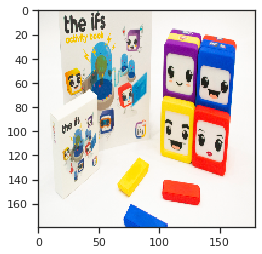

In [192]:
#img = cv2.imread('gamecube.jpg',0)      #Esto para cargar una imagen local
img = io.imread(image_src)
img_resized=cv2.resize(img, (180,180))
plt.imshow(img_resized, cmap='gray')
cv2.imwrite("imagen.png", img_resized)
del img

In [193]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
xs = []
x1 = load_img("imagen.png")
y1 = img_to_array(x1)/255.0
xs.append(y1)
del x1
array_image = np.asarray(xs)
del xs
array_image.shape

(1, 180, 180, 3)

In [194]:
predict_images = modelVGG.predict(array_image,verbose=1).ravel()
predict_images = np.round(predict_images)
predict_images = list(map(lambda x: 'successful' if x == 1 else 'failed', predict_images))

print('Prediction state:\t %s\nSuccessful probability:\t %.2f%%' %\
      (predict_images[0], 
       modelVGG.predict_proba(array_image)[0][0]*100))

1/1 [==============================] - 1s 875ms/step
Prediction state:	 successful
Successful probability:	 51.19%


## Descripciones

In [0]:
from sklearn.externals import joblib
import numpy as np

In [0]:
## Esta es la mitad de la descripción del proyecto que estamos evaluando
#The Ifs is a new educational toy that teaches kids from 3 to 10 years old the basics of computer programming. It consists of a family of four robots in which each member has different superpowers. Children imagine amazing adventures and bring them to life by programming the robots. The Ifs strengthens learning through play in early childhood and is suitable for middle childhood to learn more complex concepts. The Ifs gets your child moving. Coding is just the beginning of the game! It requires imagination and can be used in lots of different ways. It is suitable for a wide range of ages and abilities. It encourages interaction with siblings, friends, and especially with parents. It uses narrative learning, so children learn and play with the stories of our robot family. As parents and educators, our goal is to help children develop safe and healthy habits for technology use. With this in mind, we designed The Ifs to empower our own kids and students to become creative, engaged, lifelong learners. These skills are essential so children can invent their own future. Preschoolers from 3 years play The Ifs with their parents and experiment with light, music, color, or even emotions. From 4 to 6 years, children use their imaginations to combine basic blocks in amazing adventures with flashlights, traps, or chain reactions. Kids from 6 to 8 years use the whole set of blocks to create awesome inventions, such as a wireless alarm, a Morse phone, or a pet feeder. From 8 to 10 years, children discover how to program the robots using Scratch for Arduino and also how to design and 3D print funny costumes. Parents don’t need any coding experience. The Ifs is designed to be intuitive and easy to use, and parents play with their kids without worry. Nevertheless, if you are a coding geek, The Ifs is an Open Source project, and we would love you to contribute. Hands-on learning is the process of learning by doing. Children explore, follow their curiosity, and discover things on their own and with each other. We know kids naturally play and love making things with their own hands. It’s also true that technology is an important part of our world that is transforming childhood education. We embrace these ideas so children are able to build code by physically placing blocks in the robot’s head with the help of magnets. As parents and educators, we know that regulating children’s screen time is a constant battle. The Ifs are programmed without screens, using blocks with different colors and intuitive images to represent the instructions. Tangible programming makes coding easy and accessible to everyone, even children from the age of three, before learning to read or write. Learning a computer programming language is a complex and usually frustrating task that takes years to master. Clearly, not every kid will be interested in a career in computer science, but having basic coding skills is becoming appreciated in many other job sectors such as engineering, science, art, and design. Learning the basics at an early age provides a positive experience and builds self-confidence to grasp more abstract concepts at school. The Ifs are full of sensors and actuators, but they need some instructions in order to function. Programming them is as simple as placing blocks on their heads with the help of magnets. No screens are involved. Tangible programming makes coding easy and accessible to children of a wide range of ages and abilities. The robots are programmed using two different blocks: if (condition), then (action). Each block has a different image serving as an intuitive symbol to represent an instruction. Combining these two parts, kids play with loops, statements, and algorithms while also creating their own stories: building a flashlight to read in bed after lights-out or making an alarm to protect the cookie jar. The Ifs teach your child the basics of computer programming: More important, The Ifs require imagination, encourage interaction with others, and promote healthy habits for technology use: The Ifs are designed for fun and adventure. Fun has a positive effect on motivation, determining what we learn and how much we retain. Learning requires repetition and dedication. If the experience is fun, kids will stay curious and keep coming back for more. Check out these awesome games that our kids love to play with The Ifs: Scavenger hunt: Parents combine the blocks so the robots call the others under different actions, such as shaking or turning them upside down. The robots are hidden around the house, and one of them is given to the children as the first clue. Using the symbols in the blocks or just experimenting, kids discover the action that makes the robot to light up and call the others, that will respond with a beep. Children run around the house, activating the robots, listening to the beeps, and discovering one after another. Dancing orchestra: Each child takes a robot and a block for playing an instrument (such as drums, cymbals, or maracas) and another block from the different physical actions (such as jump, shake or tap). Parents turn music on, and children dance and move to activate the robots and follow the rhythm of their favorite songs. Any time the music stops, children must exchange robots. Treasure trap: Protect your favorite toys and sweets from your little sibling. Combine the blocks so the robot imitates a lion’s roar when it detects a change in the ambient light. Put the robot inside your treasure chest (any box or a closet) and close the lid. If your little sibling tries to open it, the robot wakes up and roars to scare him. Angry robots: This game is perfect for toddlers to explore emotions. Parents combine the blocks so Holly expresses emotions (making sounds) for different physical actions. For instance, fear when you turn her upside down, joy when you blow on her face, or anger when you shake her. Each playset comes with everything you need to begin your coding adventure: The Ifs are a family of four interconnected robots, full of sensors and actuators. They  are able to work together to solve problems and complete various actions – from measuring movements, light, sound, temperature and humidity to speaking, singing, imitating, vibrating and lighting up. Each member of the robot family, including Emma, Liam, Noah and Holly, has a unique function or ‘super power’: movement, emotions, a presence detector, and color changes. Emma is the mother of the family. She blends in with the background, just like a chameleon, using her color sensor. Liam is the father. If someone gets too close and tries to trick him, he will wake up thanks to his presence detector. Noah is the eldest son. He is very lively and he’s always on the move, shaking to create chain reactions. Holly is the youngest robot of the family. She expresses her emotions, depending on how she’s programmed. Starting from simple concepts, children can create their own characters using tools  like Tinkercad and 3d printing. The gender gap persists in the tech field. Getting more women into tech will lead to innovations that reflect the wants and needs of half the population. Inspiring young girls to develop an interest in STEM is crucial to overcome this gap. Nowadays, the majority of STEM toys, especially robots, are targeted to boys. Fortunately, this is changing, and more and more tech toys for girls and boys are coming to the market. We wanted to do our part, so we designed The Ifs gender-neutral so that parents do not identify the toy with a gender and can buy it for both boys and girls. We also like the idea of mixing robots with characters that represent family members so children learn and play with the stories of our awesome robot family. The Ifs are not only for children but also for parents committed to Open Source technology. We are growing a community to share our latest developments and incorporate the feedback and contributions of all the users. Even more, the heart of The Ifs is an electronic board compatible with the Arduino IDE. This feature, together with the Open Source firmware, makes The Ifs fully customizable and perfect for your next DIY project! Finally, if the campaign is successful, we will release the schematics of a basic electronic board so anyone can build their own robot at home. The Ifs Single - Includes Holly, the youngest robot of the family, and the basic set of coding blocks. Plus the playing cards and the first storybook. The Ifs Duo - Includes Holly and Noah robots, the children of the family, and the Intermediate set of coding blocks. Plus the playing cards and the first and second storybook. The Ifs Family - Includes the whole robot family (Holly, Noah, Emma and Liam) and the complete set of coding blocks. Plus the playing cards and the three storybooks. We recommend this package for your child to get the full experience. The Ifs School - This pledge allows you to support the project in a HUGE way. This is a specific reward for a school, coding club, or the institution of your choice. It includes a book with classroom activities and virtual training, and we will travel to your location if you fund the trip. Also, lifetime membership to our online resource center. We are super enthusiastic about all the exciting things that you will be using The Ifs for. Also, we are constantly thinking about new and innovative use cases. By expanding the variety of coding blocks, we hope to further inspire children by the endless possibilities of programming. Our stretch goal will be 200,000 EUR. We look forward to continuing our development so we can bring a further improved product to you. Everything is ready to go, and we just need your support. We have already verified the operation on the prototypes, but to put our product into mass production, we need your help. We thank you for your support and hope you will share in our vision. We want to be as transparent as possible and take you along every step of the way.

In [0]:
### Acá probaré con el texto de un proyecto exitoso ("successful"):
#Hello Kickstarter! We are excited to launch and share our first product - the ODIN - with the Kickstarter community. With your help, we will produce the first Android \'Smart\' projector that directly projects online content from a compact, battery-operated device allowing sharing and viewing in unlimited ways. We are thrilled with ODIN and we think you will be too. We hope you will support our campaign with contributions and by spreading the word to your community! ODIN is the ideal product for people who consume most of their entertainment using Netflix, Hulu, Amazon, the web and mobile applications. As we consume more information via the Internet, we need a compact, portable device that gives us a large visual display. These are just some of the activities you can accomplish with ODIN. We are sure that you will think of thousands of other ways. Sometimes when a problem offers no apparent answers, the only solution is to radically alter the operating parameters. After being continuously frustrated with paying for cable service I wasn’t using, I decided to make the bold move to cancel my subscription. I was getting all my news and entertainment via the Internet and my mobile phone – watching cable shows on my television was something I rarely did. Even though my new arrangement was liberating and financially empowering, I soon noticed that I missed the enjoyment of sitting back in my living room and catching a movie on a widescreen television. I decided to venture out and find a device that would meet my needs. I wanted a product that could handle all my viewing apps (Youtube, Netflix, Hulu, etc.). To my dismay, the only way I could achieve what I desired was hooking up my computer to a bulky projector (prone to inconvenient overheating) and separate, external speakers. Long story short, that search morphed into the initial idea for the creation of Dos Owls – a multi-functional, portable visual display that solves a slew of A/V problems and opens the door to a limitless universe of content sharing possibilities. It’s battery-powered, wireless (WiFi and Bluetooth), compact and connects effortlessly with the Internet. Necessity sparked invention and I haven’t looked back since. - Alex Yoo, Founder ODIN combines an Android powered PC, state-of-the-art projector, Bluetooth speakers and WiFi in a compact, portable gadget. It is battery operated and can meet the demands of today\'s digital consumers and creators who value mobility and freedom. Optical Display Contains state-of-the-art DMD optical technology that beams powerful LED light and a large screen size. Place it 10 yards away for a 250" screen size. ODIN\'s optical lens is so strong, you can see the projected screen with normal indoor lighting at up to 45" screen size, which is bigger than most flat screen TVs. ANDROID KITKAT OS Our intuitive user interface allows for simple navigation and organization of all your apps. ODIN uses a quad-core Android microprocessor and KitKat operating system, which provides access to over 1 million Android apps. CONNECTIVITY ODIN includes array of connection methods. Built in WiFi wirelessly connects to the Internet as well as a phone’s hotspot. Embedded Bluetooth allows for easy communication between external Bluetooth speakers, keyboard, mouse, and other accessories. ODIN has an HDMI port to connect to Xbox or Playstation, two USB drives for a keyboard, mouse, or flash drives, and a headphone plug. BLUETOOTH SPEAKERS ODIN has two play modes: A. Full projector mode using the projector, speakers and access to Android apps B. Bluetooth speaker mode for streaming music from your phone directly to the two speakers BATTERY ODIN\'s battery provides about 2 hours of run-time in portable mode. For extended viewing and charging, just connect ODIN to an outlet with the included power cord. FUNCTIONAL DESIGN ODIN is designed with flexibility in mind. Beam onto a wall, or rotate the head 90 degrees and display content on the ceiling for a truly unique viewing experience. (Patent Pending) COMPACT SIZE ODIN is lightweight and similarly sized to a typical paperback book. It can be easily carried in your briefcase, tote bag or jacket pocket for portability. It is 6" long, 4.25" wide, 1.8" thick, and weighs 1.7 pounds. We think pictures do a much better job than any text. Video below is a live demo during TechCrunch Disrupt. There are many artistic and creative uses for ODIN. For example, use it to create murals and other wall art, as part of an interactive art display, or as a backdrop to a party. ALEX YOO BIO - FOUNDER Originally from the suburbs of Chicago and currently residing in Bed-Stuy, Brooklyn, Alex Yoo earned his first professional experience in the fast-paced financial world of Wall Street. For five years, he plied his trade diligently at Houlihan Lokey, Nomura Securities and Tri Artisan Partners. However, he soon grew restless with the repetitive PowerPoint presentations and Excel sheets, so he decided to make a change. His next venture came about as a matter of necessity. A habitual sharp dresser, he’d always had difficulty finding dress shirts that worked for his body frame. He took a bold risk and launched an online custom shirt company called Alexander West. He poured all his energy and resources into the business, and Alexander West is presently an established player in the NYC custom clothing market. Alex’s newest project is a tech venture called Dos Owls. The idea stemmed from a desire to enjoy his NetFlix/Hulu content on a more compact, multi-functional device. The first Dos Owls product is called ODIN, and it has several distinct features including an Android processor, portable theater-like viewing, wireless connectivity, exceptional sound output and innovative design. DOS OWLS TEAM Brooklyn Creative Team China Engineering / Production Team Alex Yoo: The initial concept for what is now the Dos Owls ODIN first appeared about two years ago and I started working on developing ODIN in the Spring of 2013. Since I did not come from a technology / engineering background, I had to teach my self the basics of mechanical, industrial, optical, and electrical engineering in addition to design for manufacturing and software development (firmware/OS/application). First, I attended as many hardware workshops as possible (e.g., Hardware Innovation Workshop by MAKE and Hardware Workshop organized by Marc Barros) and talked to anyone that was in hardware technology development as well as a lot of relevant reading. I also started attending relevant Meetup groups around the NYC area and joined Hack Manhattan hackerspace to hang around technology enthusiasts and makers. The biggest development hurdle in the beginning was finding skilled and experienced engineers who could develop ODIN in addition to being economically feasible. Due to limited resources, I looked to Asia. With persistence, patience and many trips to Asia, I created connections to talented and experienced Chinese engineers and manufacturers. Shezhen, China has an amazing infrastructure of experienced engineers and electronic production facilities that can\'t be compared to anywhere in the world. Our first prototype, based on a dual-core microprocessor, failed to meet our high expectations for performance and user experience. Therefore, we are currently upgrading all of our hardware specifications (to quad-core, more RAM, Bluetooth 4.0, among others) to have robust performance using Andorid 4.4 KitKat operating system. PLEASE NOTE THAT FINAL SPECIFICATIONS CAN CHANGE. ALL OF OUR REFINEMENTS WILL BE TO IMPROVE THE DEVICE. GENERAL INTERNALS OPTICAL TECHNOLOGY POWER CONNECTIONS AUDIO TIMELINE TO SHIPPING JUNE JULY AUGUST SEPTEMBER OCTOBER NOVEMBER / DECEMBER We are currently looking for strategic business partners and financial partners with hardware experience. Please contact alex@dosowls.com. Each ODIN box will include ODIN, power cord and protective carrying case. MyType Keyboard sucessfully funded on Kickstarter on Augusut 2013. Already backing a different reward? Just add $50 per myType to your existing pledge. Kickstarter Link:http://kck.st/18iA3Sc

In [11]:
print("Escriba una descripción para la campaña de su proyecto: ")
descripcion = input()

Escriba una descripción para la campaña de su proyecto: 
The Ifs is a new educational toy that teaches kids from 3 to 10 years old the basics of computer programming. It consists of a family of four robots in which each member has different superpowers. Children imagine amazing adventures and bring them to life by programming the robots. The Ifs strengthens learning through play in early childhood and is suitable for middle childhood to learn more complex concepts. The Ifs gets your child moving. Coding is just the beginning of the game! It requires imagination and can be used in lots of different ways. It is suitable for a wide range of ages and abilities. It encourages interaction with siblings, friends, and especially with parents. It uses narrative learning, so children learn and play with the stories of our robot family. As parents and educators, our goal is to help children develop safe and healthy habits for technology use. With this in mind, we designed The Ifs to empower our o

In [10]:
import re ## regular expression
!sudo pip install contractions
!sudo pip install textsearch
import contractions
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from textblob import TextBlob, Word
import nltk
nltk.download('averaged_perceptron_tagger')

## configurar stopwords
stop_w = set(stopwords.words("english"))
print(stop_w)

     |████████████████████████████████| 317kB 6.7MB/s 
     |████████████████████████████████| 245kB 66.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81703 sha256=18fdb1753f49bfd13292342ee72e68720b2b8dee03ab6133ec6291572945b54a
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
{'m', 'against', 'only', "that'll", 'other', 'for', 'in', 'above', 'both', "it's", 'whom'

In [12]:
# Del texto de entrada, se realizará una limpieza de caracteres especiales, contracciones, etc

import pandas as pd
## remover caracteres especiales
df = pd.DataFrame([descripcion],columns=['description'])
df
re_contractions = []
for text in df.description:
    try:
        new_text = contractions.fix(text)
        re_contractions.append(new_text)
    except AttributeError:
        new_text = ' '
        re_contractions.append(new_text)
df["re_contractions"] = re_contractions

## remover caracteres especiales
re_special_chars = []
for text in df.re_contractions:
    new_text = re.sub(r"\W+", " ", text) ## remover caracteres
    new_text = re.sub(r'\w*\d\w*', '', new_text) ## remover numbers
    re_special_chars.append(new_text)
df["re_special_char"] = re_special_chars

## minúsculas
lower_case = []
for tex in df.re_special_char:
    new_text = tex.lower()
    lower_case.append(new_text)
df["lower_case"] = lower_case

## tokenización
tokens = []
for text in df.lower_case:
    new_text = word_tokenize(text)
    tokens.append(new_text)
df["tokens"] = tokens

## eliminar palabras de parada
re_stopwords = []
for lista in df.tokens:
    not_stopwords = []
    for w in lista:
        if w not in stop_w:
            not_stopwords.append(w)
    re_stopwords.append(not_stopwords)
df["re_stopwords"] = re_stopwords

## lematización
lemmatizer = WordNetLemmatizer()
lemmatization = []
for lista in df.re_stopwords:
    lemmas = []
    for w in lista:  
        word1 = lemmatizer.lemmatize(w, pos = "n")      #Lematizando con NLTK
        word2 = lemmatizer.lemmatize(word1, pos = "v")
        word3 = lemmatizer.lemmatize(word2, pos = ("a"))
        lemmas.append(word3)
        #new_text = lemmatize_with_postag(w)  #Lematizando con TextBlob    
    lemmatization.append(lemmas)
df["lemmatization"] = lemmatization

## unir tokens
text_clean = []
for lista in df.lemmatization:
    text = " ".join(lista).strip()
    text_clean.append(text)

df["text_clean"] = text_clean
df.head()

descripcion = df.text_clean
descripcion

0    ifs new educational toy teach kid year old bas...
Name: text_clean, dtype: object

### TF-IDF

In [0]:
# load the model from disk
filename_descriptions = 'description_model_tfidf.sav'
description_model_tfidf = joblib.load(filename_descriptions)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pickle

## Cargando TF-IDF con vocabulario original de 183,249 palabras entrenadas
transformer = TfidfTransformer()
loaded_vec = TfidfVectorizer(vocabulary=pickle.load(open("feature_tfidf.pkl", "rb")))
tfidf_new = transformer.fit_transform(loaded_vec.fit_transform(descripcion))

In [20]:
predict_description_tfidf = description_model_tfidf.predict(tfidf_new)

print('Prediction state:\t %s\nSuccessful probability:\t %.2f%%' %\
      (predict_description_tfidf[0], 
       (1-description_model_tfidf.predict_proba(tfidf_new)[0][0])*100))

Prediction state:	 successful
Successful probability:	 50.99%


In [156]:
## Realizando pruebas con textos del test
#X_test_description = np.load('description_X_test.npy',allow_pickle=True)
#X_test_description = X_test_description.flatten().tolist()
#X_test_description[0:5]

['want make sell target design use people age walk life go make target want film shoot steel advertise want world see people hit target foam dart foot pumpkin lob mile want see also want clear business buy sell weapon weapon accessory target system target anything nerf gun pumpkin launcher',
 'group people walk life develop platform real estate agent assist day day activity online presence platform suitable new agent well experience agent offerswebsites modern clean look attract visitor give feel home web platform extremely user friendly agent able build website minute help agent stay touch client get business send e card email blast drip campaign list update attract lead share list via facebook twitter linkedin click button platform manageall agent contact calendar entry task keep one place synchronize across mobile platform get agent website lead instantly contact database integrate website platform fully integrate real estate board modern list map showcasing agent list launch initia

In [0]:
#descripcion = X_test_description[5]

### Bow

In [0]:
# load the model from disk
filename_descriptions = 'description_model_bow.sav'
description_model_bow = joblib.load(filename_descriptions)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

## BoW
vectorizer = CountVectorizer(vocabulary=pickle.load(open("feature_bow.pkl", "rb")))
bow_new = vectorizer.fit_transform(descripcion)

predict_description_bow = description_model_bow.predict(bow_new)
predict_description_bow
print('Prediction state:\t %s\nSuccessful probability:\t %.2f%%' %\
      (predict_description_bow[0], 
       (1-description_model_bow.predict_proba(bow_new)[0][0])*100))

Prediction state:	 successful
Successful probability:	 42.67%
